In [29]:
import pandas as pd

#refer to data sci handbook, preclean data before loading into csv reader
df = pd.read_csv(r'C:\Users\Admin\OneDrive\Documents\Data Science\nyc_income_by_zipcode.csv', header=None)
df.columns = ["Zipcode","Income"]

df

,Zipcode,Income
0,11358,51242
1,11367,45285
2,11354,37155
3,11355,36973
4,10464,57458
...,...,...
103,11434,43133
104,11432,42414
105,11436,40194
106,11435,40157


combine 2 datasets into 1, based on income data first 

In [30]:
import numpy as np

df1 = pd.read_csv(r'C:\Users\Admin\OneDrive\Documents\Data Science\nyc_311_limit_2019.csv', 
                  error_bad_lines=False, warn_bad_lines=False, header=None)
#a lot of formatting issues: mostly having too many fields, maybe b/c of comma in desc? load it as a tsv file 
#in the future

df1.columns=["Opened", "Closed", "Type", "Desc", "Zipcode"]

df1 = df1[["Zipcode", "Opened", "Closed", "Type", "Desc"]]


df1['Zipcode'] = df1['Zipcode'].apply(lambda x: x if str(x).isdigit() else np.nan) 
df1 = df1.dropna()

#df_joined = df.set_index('Zipcodes')

In [31]:
df1['Zipcode'] = df1['Zipcode'].astype(np.int64)
df1.Zipcode

0          10032
1          10472
2          11420
3          11221
4          10009
           ...  
1555048    11105
1555049    11221
1555050    11432
1555051    10312
1555052    11211
Name: Zipcode, Length: 1407652, dtype: int64

### well now. how about finding the relationships between response time and complaint type?

joining the datasets by zipcode

In [37]:
df_joined = df1.join(df.set_index('Zipcode'), on='Zipcode')
df_w_income = df_joined.dropna()

print(len(df_w_income['Zipcode']), len(df_joined['Zipcode']))

df_w_income

1026991 1407652


,Zipcode,Opened,Closed,Type,Desc,Income
0,10032,01/01/2019 02:56:05 AM,01/01/2019 03:46:44 AM,Noise - Residential,Loud Music/Party,26237.0
1,10472,01/01/2019 03:38:10 AM,01/01/2019 04:12:06 PM,Noise - Residential,Loud Music/Party,23565.0
3,11221,01/01/2019 06:07:47 AM,01/01/2019 06:41:39 AM,Noise - Residential,Loud Music/Party,22305.0
6,11234,01/01/2019 12:21:04 AM,01/01/2019 03:03:42 AM,Noise - Street/Sidewalk,Loud Music/Party,51446.0
7,11209,01/01/2019 01:46:40 AM,01/01/2019 06:22:28 AM,Noise - Street/Sidewalk,Loud Music/Party,44518.0
...,...,...,...,...,...,...
1555047,11209,01/04/2019 02:12:35 PM,01/07/2019 06:46:44 PM,DOF Property - Reduction Issue,Personal STAR Exemption,44518.0
1555049,11221,01/04/2019 01:19:07 PM,01/07/2019 12:16:42 PM,DOF Property - Reduction Issue,Commercial Not For Profit Exemption,22305.0
1555050,11432,01/04/2019 12:01:07 PM,01/07/2019 12:11:25 PM,DOF Property - Reduction Issue,Commercial Not For Profit Exemption,42414.0
1555051,10312,01/04/2019 02:12:32 PM,01/07/2019 09:54:07 AM,DOF Property - Request Copy,Copy of Statement,67728.0


In [ ]:
import datetime

resp_time = []

for i, x in df_w_income.iterrows():
    t1 = datetime.datetime.strptime(str(x[1]), '%m/%d/%Y %I:%M:%S %p')
    if str(x[2]).lower() == 'nan':
        resp_time.append(np.nan)
        continue
    t2 = datetime.datetime.strptime(str(x[2]), '%m/%d/%Y %I:%M:%S %p')
    reptime = (t2 - t1).total_seconds() / 3600  # response time in hours
    if reptime < 0:
        resp_time.append(np.nan)
        continue
    resp_time.append(reptime)

df_w_income.insert(3, 'RespTime', resp_time)

In [42]:
df_w_income.dropna()


,Zipcode,Opened,Closed,RespTime,Type,Desc,Income
0,10032,01/01/2019 02:56:05 AM,01/01/2019 03:46:44 AM,0.844167,Noise - Residential,Loud Music/Party,26237.0
1,10472,01/01/2019 03:38:10 AM,01/01/2019 04:12:06 PM,12.565556,Noise - Residential,Loud Music/Party,23565.0
3,11221,01/01/2019 06:07:47 AM,01/01/2019 06:41:39 AM,0.564444,Noise - Residential,Loud Music/Party,22305.0
6,11234,01/01/2019 12:21:04 AM,01/01/2019 03:03:42 AM,2.710556,Noise - Street/Sidewalk,Loud Music/Party,51446.0
7,11209,01/01/2019 01:46:40 AM,01/01/2019 06:22:28 AM,4.596667,Noise - Street/Sidewalk,Loud Music/Party,44518.0
...,...,...,...,...,...,...,...
1555047,11209,01/04/2019 02:12:35 PM,01/07/2019 06:46:44 PM,76.569167,DOF Property - Reduction Issue,Personal STAR Exemption,44518.0
1555049,11221,01/04/2019 01:19:07 PM,01/07/2019 12:16:42 PM,70.959722,DOF Property - Reduction Issue,Commercial Not For Profit Exemption,22305.0
1555050,11432,01/04/2019 12:01:07 PM,01/07/2019 12:11:25 PM,72.171667,DOF Property - Reduction Issue,Commercial Not For Profit Exemption,42414.0
1555051,10312,01/04/2019 02:12:32 PM,01/07/2019 09:54:07 AM,67.693056,DOF Property - Request Copy,Copy of Statement,67728.0


correlation between income & response time: less than negligible 

In [60]:
corr_w_extreme = df_w_income['RespTime'].corr(df_w_income['Income'], method='spearman')

#some response times are WAY too high... how to get rid of
df_no_extreme = df_w_income[df_w_income['RespTime'] < 200]

corr_no_extreme = df_no_extreme['RespTime'].corr(df_no_extreme['Income'], method='kendall')

print(corr_w_extreme, ',', corr_no_extreme)

-0.026482281704157815 , -0.010046275960721926


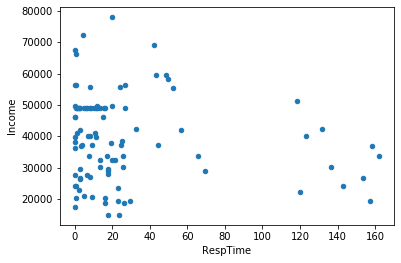

In [62]:
from matplotlib import pyplot as plt

df_subset = df_no_extreme.iloc[2000:2100, :]

#df_subset

df_subset.plot(kind="scatter", x="RespTime", y="Income")